In [34]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [35]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
#print(X_train.shape)
#print(X_test.shape)

In [36]:
df = pd.read_csv("./Titanic_Survival_train.csv")


In [37]:
df1 = pd.read_csv("./test.csv")

In [38]:
d1=df["Sex"]
list1=[]
for i in d1:
    #print(i)
    if i == "male":
        list1.append(1)
    elif i == "female":
        list1.append(0)
sex=pd.Series(list1)
df["Sex"]=sex
#print(sex)

In [39]:
d2=df1["Sex"]
list2=[]
for j in d2:
    #print(j)
    if j == "male":
        list2.append(1)
    elif j == "female":
        list2.append(0)
sex=pd.Series(list2)
df1["Sex"]=sex

In [40]:
#df.head(20)

In [41]:
#df1.head(20)

In [42]:
df = df.drop(['PassengerId', 'Name','Embarked','Cabin','Ticket'], axis=1)

In [43]:
df1 = df1.drop(['PassengerId', 'Name','Embarked','Cabin','Ticket'], axis=1)

In [44]:
#df.describe()

In [45]:
#df1.describe()

In [46]:
df.shape

(891, 7)

In [47]:
df1.shape

(418, 6)

In [48]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN",strategy = "most_frequent" , axis = 0)
imputer = imputer.fit(df.iloc[:, 0:8].values)
df.iloc[:, 0:8] = imputer.transform(df.iloc[:, 0:8])

C:\Users\DELL.DESKTOP-C18N4A6\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [49]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN",strategy = "most_frequent" , axis = 0)
imputer = imputer.fit(df1.iloc[:, 0:8].values)
df1.iloc[:, 0:8] = imputer.transform(df1.iloc[:, 0:8])

C:\Users\DELL.DESKTOP-C18N4A6\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [50]:
X_test = df[list(df.columns)[1:6]]
Y_test = df[list(df.columns)[0]]

In [51]:
X_train = df[list(df.columns)[1:6]]
Y_train = df[list(df.columns)[0]]

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

log = LogisticRegression(random_state=42, penalty='l2')
#log = LogisticRegression(random_state=42)
log.fit(X_train, Y_train)
print(log)
print("coefs:", log.coef_)
print("intercept:", log.intercept_)
Y_pred = log.predict(X_test)
print("LR accuracy:", accuracy_score(Y_test, Y_pred))
print("LR F1:", f1_score(Y_test, Y_pred))
print("LR CM:\n", confusion_matrix(Y_test, Y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
coefs: [[-0.97107827 -2.50343409 -0.02705348 -0.27156059 -0.02519782]]
intercept: [4.13429681]
LR accuracy: 0.7890011223344556
LR F1: 0.7151515151515151
LR CM:
 [[467  82]
 [106 236]]


C:\Users\DELL.DESKTOP-C18N4A6\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
from sklearn.svm import SVC
svc = SVC(random_state=42, kernel='rbf', verbose=True)
svc.fit(X_train, Y_train)
print(svc)
print("num support vectors:", len(svc.support_vectors_))
Y_pred = svc.predict(X_test)
print("SVC accuracy:", accuracy_score(Y_test, Y_pred))
print("SVC F1:", f1_score(Y_test, Y_pred))
print("SVC CM:\n", confusion_matrix(Y_test, Y_pred))


[LibSVM]SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=True)
num support vectors: 533
SVC accuracy: 0.8619528619528619
SVC F1: 0.810477657935285
SVC CM:
 [[505  44]
 [ 79 263]]


C:\Users\DELL.DESKTOP-C18N4A6\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam',                          #For neural network
                    alpha=1e-1,                             #multy level pelsoptrom
                    hidden_layer_sizes=(100,), 
                    random_state=1, 
                    verbose=True)
mlp.fit(X_train, Y_train)        #to fit the train datas
print("MLP model:", mlp)
Y_pred = mlp.predict(X_test)                  #to predict.
print("NN accuracy:", accuracy_score(Y_test, Y_pred))
print("NN F1:", f1_score(Y_test, Y_pred))
print("NN CM:\n", confusion_matrix(Y_test, Y_pred))

Iteration 1, loss = 1.32362428
Iteration 2, loss = 0.74929181
Iteration 3, loss = 0.80409580
Iteration 4, loss = 0.79122421
Iteration 5, loss = 0.69946041
Iteration 6, loss = 0.67770382
Iteration 7, loss = 0.68089036
Iteration 8, loss = 0.65645282
Iteration 9, loss = 0.64941534
Iteration 10, loss = 0.64318450
Iteration 11, loss = 0.63068622
Iteration 12, loss = 0.62551264
Iteration 13, loss = 0.61896465
Iteration 14, loss = 0.61164787
Iteration 15, loss = 0.60591409
Iteration 16, loss = 0.59730959
Iteration 17, loss = 0.58902820
Iteration 18, loss = 0.58320415
Iteration 19, loss = 0.57874759
Iteration 20, loss = 0.57281534
Iteration 21, loss = 0.56861619
Iteration 22, loss = 0.56502199
Iteration 23, loss = 0.56043241
Iteration 24, loss = 0.55698563
Iteration 25, loss = 0.55259256
Iteration 26, loss = 0.54915194
Iteration 27, loss = 0.54538397
Iteration 28, loss = 0.54168524
Iteration 29, loss = 0.53814327
Iteration 30, loss = 0.53441964
Iteration 31, loss = 0.53065237
Iteration 32, los

C:\Users\DELL.DESKTOP-C18N4A6\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [55]:
from sklearn.linear_model import LinearRegression
print("\nLINEAR")
rgr = LinearRegression(normalize=True)
rgr.fit(X_train, Y_train)
print("model:", rgr)
print("coeffs:", rgr.coef_)
print("intercept:", rgr.intercept_)
Y_predictions = rgr.predict(X_test)
Y_predictions = Y_predictions.round()


LINEAR
model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
coeffs: [-0.18537494 -0.51521773 -0.00568987 -0.04134509 -0.0131677 ]
intercept: 1.334641783167407


In [56]:
#class_sex_group["Survived"].plot.bar()
#plt.show()

In [57]:
count = 0
for k in df.Fare:
    if k >=200:
        count +=1
print(count)


20


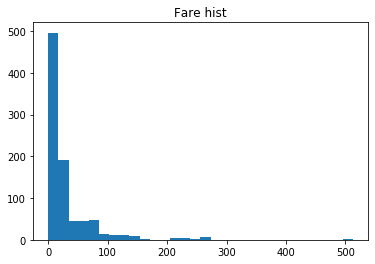

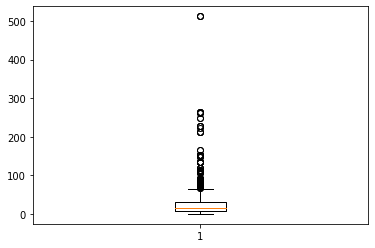

In [58]:
plt.hist(df.Fare.dropna(), bins=30, density=False)
plt.title("Fare hist")
plt.show()

plt.boxplot(df.Fare)
plt.show()

In [59]:
df_200 = df[df['Fare'] <= 200]
df_200.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,0.376579,2.338691,0.653272,28.523731,0.517796,0.366246,26.530170
std,0.484806,0.821469,0.476202,13.220415,1.101448,0.792325,29.351184
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,13.862500
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,164.866700


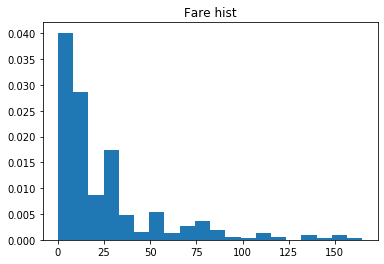

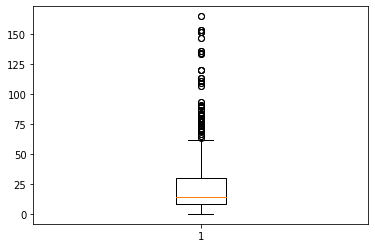

In [60]:
plt.hist(df_200.Fare.dropna(), bins=20, density=True)
plt.title("Fare hist")
plt.show()

plt.boxplot(df_200.Fare)
plt.show()

In [61]:
#df.groupby('SibSp').mean()

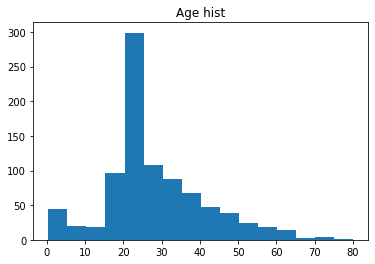

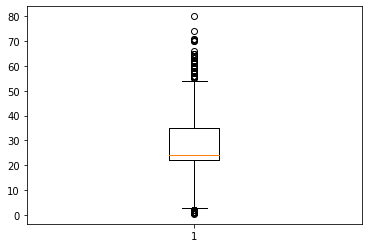

In [62]:
plt.hist(df.Age.dropna(), bins=16, density=False)
plt.title("Age hist")
plt.show()

plt.boxplot(df.Age.dropna())
plt.show()

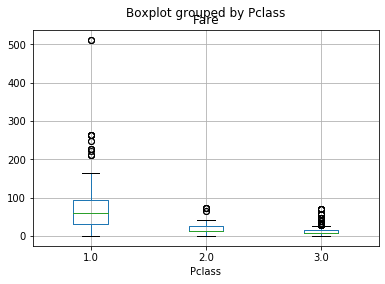

In [63]:
boxplot = df.boxplot(column = 'Fare', by='Pclass')
plt.show()

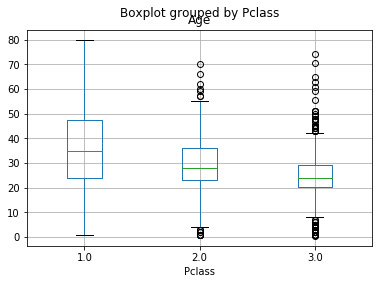

In [64]:
boxplot = df.boxplot(column = 'Age', by='Pclass')
plt.show()

No handles with labels found to put in legend.


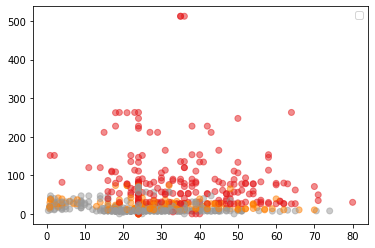

In [65]:
df.dropna()
plt.scatter(x=df.Age, y=df.Fare, c=df.Pclass, cmap='Set1', alpha=0.5)
plt.legend(loc='upper right')
plt.show()

No handles with labels found to put in legend.


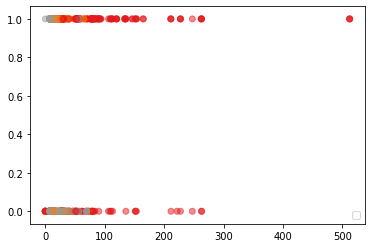

In [66]:
df.dropna()
plt.scatter(x=df.Fare, y=df.Survived, c=df.Pclass, cmap='Set1', alpha=0.5)
plt.legend(loc='lower right')
plt.show()